# Kalman Filter for Sensor Fusion

This notebook implements a Kalman Filter for fusing odometry and IMU data, as used in robotics (e.g., ABU Robocon 2025 project).



In [ ]:
pip install numpy matplotlib


284.57s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import matplotlib.pyplot as plt


In [7]:
class KalmanFilter:
    def __init__(self):
        self.x = np.zeros((3, 1))  # [x, y, theta]
        self.P = np.eye(3) * 1000  # Initial covariance
        self.F = np.eye(3)         # State transition
        self.H = np.eye(3)         # Measurement model
        self.R = np.eye(3) * 0.5   # Measurement noise
        self.Q = np.eye(3) * 0.1   # Process noise

    def predict(self, control_input=np.zeros((3,1))):
        self.x = self.F @ self.x + control_input
        self.P = self.F @ self.P @ self.F.T + self.Q

    def update(self, z):
        y = z - self.H @ self.x
        S = self.H @ self.P @ self.H.T + self.R
        K = self.P @ self.H.T @ np.linalg.inv(S)
        self.x += K @ y
        self.P = (np.eye(3) - K @ self.H) @ self.P


In [8]:
np.random.seed(0)
n_steps = 50
true_states = []
imu_measurements = []
odom_measurements = []

x, y, theta = 0, 0, 0

for _ in range(n_steps):
    vx, vy, omega = 1, 0.5, 0.1
    x += vx + np.random.normal(0, 0.1)
    y += vy + np.random.normal(0, 0.1)
    theta += omega + np.random.normal(0, 0.01)

    true_states.append([x, y, theta])

    imu_measurements.append([x + np.random.normal(0, 0.3),
                             y + np.random.normal(0, 0.3),
                             theta + np.random.normal(0, 0.05)])

    odom_measurements.append([x + np.random.normal(0, 0.2),
                              y + np.random.normal(0, 0.2),
                              theta + np.random.normal(0, 0.05)])


In [9]:
kf = KalmanFilter()
estimated = []

for i in range(n_steps):
    imu = np.array(imu_measurements[i]).reshape((3, 1))
    odom = np.array(odom_measurements[i]).reshape((3, 1))
    z = (imu + odom) / 2  # Fused measurement

    kf.predict()
    kf.update(z)
    estimated.append(kf.x.flatten())


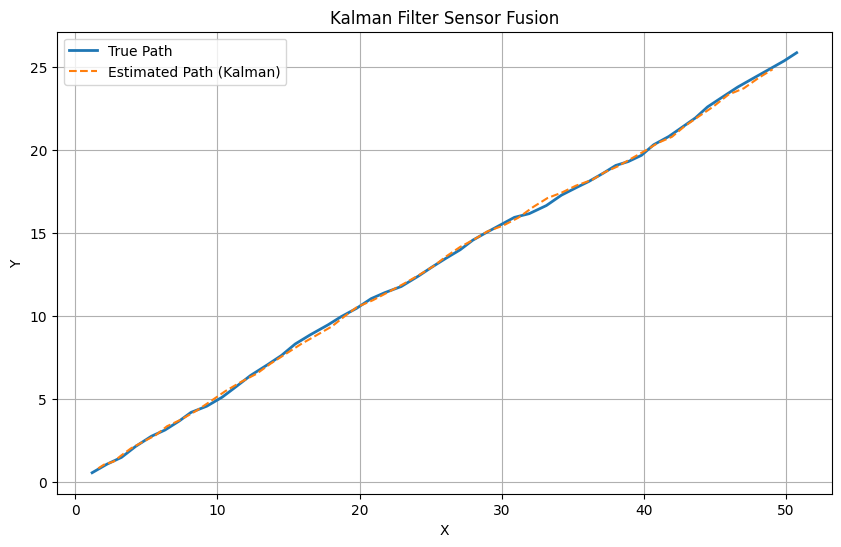

In [10]:
true_states = np.array(true_states)
estimated = np.array(estimated)

plt.figure(figsize=(10,6))
plt.plot(true_states[:,0], true_states[:,1], label='True Path', linewidth=2)
plt.plot(estimated[:,0], estimated[:,1], label='Estimated Path (Kalman)', linestyle='--')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Kalman Filter Sensor Fusion')
plt.legend()
plt.grid()
plt.show()
